<a href="https://colab.research.google.com/github/devanshdhir2/Parameter-Optimization/blob/main/Parameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn tqdm


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (e.g., Letter Recognition)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
           'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
data = pd.read_csv(url, names=columns)

# Encode target
le = LabelEncoder()
data['letter'] = le.fit_transform(data['letter'])

X = data.drop('letter', axis=1)
y = data['letter']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define SVM parameter space
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.1, 1, 10]
gamma_values = ['scale', 'auto']

# Store results
results = []
best_accuracies = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=i)

    best_score = 0
    best_params = {}
    accuracies = []

    for iteration in tqdm(range(100)):
        kernel = np.random.choice(kernels)
        C = np.random.choice(C_values)
        gamma = np.random.choice(gamma_values)

        model = SVC(kernel=kernel, C=C, gamma=gamma)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

        if acc > best_score:
            best_score = acc
            best_params = {'Kernel': kernel, 'C': C, 'Gamma': gamma}

    results.append({
        'Sample': f'S{i+1}',
        'Best Accuracy': round(best_score * 100, 2),
        'Best SVM Parameters': f"{best_params['Kernel']}, C={best_params['C']}, γ={best_params['Gamma']}"
    })
    best_accuracies.append(accuracies)


 66%|██████▌   | 66/100 [08:58<04:55,  8.68s/it]

  Sample  Best Accuracy   Best SVM Parameters
0     S1          97.25   rbf, C=10.0, γ=auto
1     S2          96.67  rbf, C=10.0, γ=scale
2     S3          97.03  rbf, C=10.0, γ=scale
3     S4          96.78  rbf, C=10.0, γ=scale
4     S5          96.52  rbf, C=10.0, γ=scale
5     S6          96.93   rbf, C=10.0, γ=auto
6     S7          96.62  rbf, C=10.0, γ=scale
7     S8          97.03   rbf, C=10.0, γ=auto
8     S9          97.13   rbf, C=10.0, γ=auto
9    S10          97.12  rbf, C=10.0, γ=scale


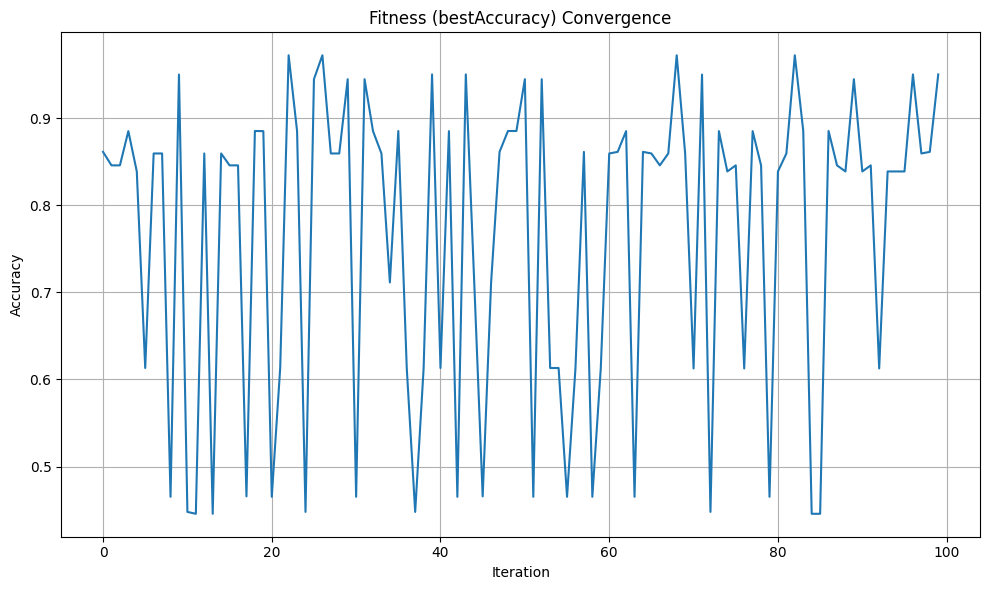

In [3]:

# Save results table
results_df = pd.DataFrame(results)
print(results_df)

# Plot convergence graph for best accuracy sample
best_index = results_df['Best Accuracy'].idxmax()
plt.figure(figsize=(10, 6))
plt.plot(best_accuracies[best_index])
plt.title('Fitness (bestAccuracy) Convergence')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.savefig('convergence_best_svm.png')
plt.show()


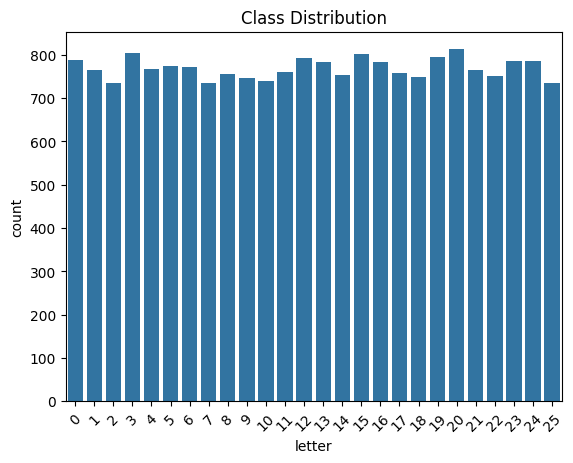

In [4]:
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()